In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parte I

In [16]:
archiveAll = 'dataAll.txt'
dataAll = np.fromfile(archiveAll)
lenAll = int(len(dataAll)/3)
dataAll = np.reshape(dataAll, (lenAll,3)) 
# Eu sei que é (m,1,3), mas na prática não vimos muita diferença então colocamos (m,3)

dataAll

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

In [17]:
w = np.random.uniform(low=-0.5,high=0.5,size=2)
x = dataAll
err = np.repeat(1, len(x)) #
n = 0.1
aj = 0
print("Pesos iniciais:",w)
epoca = 0
l = []
while (np.isin(1, err)):
    epoca += 1
    print("Época",epoca)
    for i in range(len(x)):
        yd = x[i][2]
        xd = np.array([x[i][0],x[i][1]])
        sigma = w[0]*xd[0]+w[1]*xd[1]
        if (sigma >= 0): # função degrau
            y = 1
        else:
            y = 0
        if (y != yd):
            err[i] = 1
            aj += 1
            w = w + n*(yd-y)*xd
            print(w)
        else:
            err[i] = 0

Pesos iniciais: [0.27895814 0.13064035]
Época 1
[ 16.77722814 -61.19099965]
[ 89.57324814 -25.36143965]
[   6.04363814 -124.48726965]
[  55.23049814 -107.85853965]
[137.82919814 -28.00270965]
[  97.82028814 -105.89539965]
[147.28110814 -57.00134965]
[ 107.73185814 -154.09538965]
[199.97383814 -67.62281965]
[188.07672814 -95.52235965]
[ 159.86926814 -129.10647965]
[  95.58005814 -197.17110965]
[ 148.68437814 -161.39170965]
[ 213.67553814 -100.50002965]
[ 162.74195814 -163.89999965]
[249.87671814 -77.21016965]
[ 197.96138814 -133.41118965]
[ 133.07535814 -208.02727965]
[ 200.11300814 -157.86077965]
[ 122.65005814 -255.84848965]
[ 207.50093814 -194.57510965]
[ 140.82610814 -264.47043965]
[ 172.27649814 -240.03903965]
[ 235.17380814 -181.85207965]
[ 186.05667814 -233.70097965]
[ 277.97494814 -151.38586965]
[ 232.61555814 -231.53326965]
[ 184.34899814 -280.00298965]
[ 254.21262814 -215.78404965]
[ 198.37689814 -271.96157965]
[ 275.36436814 -207.11224965]
[ 239.09432814 -250.34028965]
[ 321.

In [18]:
print("Foram feitos",aj,"ajustes")
print("E se levaram",epoca,"épocas")

# O número total de ajustes no vetor de pesos;
# (b) O número de épocas até a convergência;
# (c) O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes
# obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de
# cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.
# x2 = 1.000369759x1

Foram feitos 198 ajustes
E se levaram 16 épocas


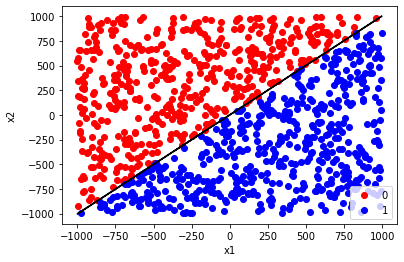

In [19]:
import pandas as pd

df = pd.DataFrame(dataAll, columns=['x1', 'x2', 'y'])

x0 = np.array(df[df['y'] == 0]) 
x1 = np.array(df[df['y'] == 1]) 

X = [x0, x1]
colors = ["red", "blue"]

for x, c in zip(X, colors):
    if c == "red":
        plt.scatter(x[:,0], x[:,1], color = c, label = "0")
    else:
        plt.scatter(x[:,0], x[:,1], color = c, label = "1")
        
x_ = np.array(df['x1'])
y = x_ * (-w[0]/w[1])

plt.plot(x_, y,'black')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

# Parte II

In [20]:
# Hiago - 1515280014
# Alex - 1515080008

archive = 'data' + str((4+8) % 4) + '.txt'
data0 = np.fromfile(archive)
len0 = int(len(data0)/3)
data0 = np.reshape(data0, (len0,3))

nl = [0.4,0.1,0.01]
Il = [100, 1, 0.5]
for N in nl:
    for I in Il:
        w = np.random.uniform(low=-I,high=I,size=2)
        x = data0
        err = np.repeat(1, len(x))
        n = N
        aj = 0
        print("Pesos iniciais:",w)
        epoca = 0
        l = []
        while (np.isin(1, err) and epoca < 100):
            epoca += 1
            for i in range(len(x)):
                yd = x[i][2]
                xd = np.array([x[i][0],x[i][1]])
                sigma = w[0]*xd[0]+w[1]*xd[1]
                if (sigma >= 0): # função degrau
                    y = 1
                else:
                    y = 0
                if (y != yd):
                    err[i] = 1
                    aj += 1
                    
                    w = w + n*(yd-y)*xd
                    #print(w)
                else:
                    err[i] = 0
        print("Taxa de aprendizado:",n)
        print("Intervalo:",-I,I)
        print("Pesos finais:",w)
        print("Épocas passadas:",epoca)
        print("Quantidade de certos:",np.count_nonzero(err == 0),"/",len(x))
        print()

Pesos iniciais: [87.10952877 33.09829642]
Taxa de aprendizado: 0.4
Intervalo: -100 100
Pesos finais: [-0.02724697  0.05847823]
Épocas passadas: 100
Quantidade de certos: 527 / 600

Pesos iniciais: [ 0.25184954 -0.19709928]
Taxa de aprendizado: 0.4
Intervalo: -1 1
Pesos finais: [0.41614372 0.43567433]
Épocas passadas: 100
Quantidade de certos: 521 / 600

Pesos iniciais: [ 0.29395811 -0.10902567]
Taxa de aprendizado: 0.4
Intervalo: -0.5 0.5
Pesos finais: [0.42005045 0.42619632]
Épocas passadas: 100
Quantidade de certos: 527 / 600

Pesos iniciais: [ -6.19718578 -57.40024881]
Taxa de aprendizado: 0.1
Intervalo: -100 100
Pesos finais: [0.10260201 0.11141682]
Épocas passadas: 100
Quantidade de certos: 526 / 600

Pesos iniciais: [0.83948102 0.33421322]
Taxa de aprendizado: 0.1
Intervalo: -1 1
Pesos finais: [0.10416887 0.10703706]
Épocas passadas: 100
Quantidade de certos: 526 / 600

Pesos iniciais: [ 0.11006545 -0.47526425]
Taxa de aprendizado: 0.1
Intervalo: -0.5 0.5
Pesos finais: [-0.007596

# Parte III

In [21]:
archive = 'dataHoldout.txt'
dataH = np.fromfile(archive)
dataH = np.reshape(dataH, (int(len(dataH)/3),3))
dataH

array([[-0.29322959, -0.09065359,  1.        ],
       [ 0.07988839,  0.21101297,  1.        ],
       [-0.07825563, -0.08083512,  1.        ],
       ...,
       [ 0.65980493,  1.05876739,  0.        ],
       [ 1.09867123,  0.87404891,  0.        ],
       [ 0.72930655,  0.93224271,  0.        ]])

In [22]:
# Fazendo o split 70%-30%

np.random.shuffle(dataH)

# Define a size for your train set 
train_size = int(0.7 * len(dataH))

# Split your dataset 
train_set = dataH[:train_size]
test_set = dataH[train_size:]

In [23]:
w = np.random.uniform(low=-1.0,high=1.0,size=2)
x = train_set
err = np.repeat(1, len(x))
n = 0.1
aj = 0
print("Pesos iniciais:",w)
epoca = 0
l = []
while (np.isin(1, err) and epoca < 100):
    epoca += 1
    for i in range(len(x)):
        yd = x[i][2]
        xd = np.array([x[i][0],x[i][1]])
        sigma = w[0]*xd[0]+w[1]*xd[1]
        if (sigma >= 0): # função degrau
            y = 1
        else:
            y = 0
        if (y != yd):
            err[i] = 1
            aj += 1
            
            w = w + n*(yd-y)*xd
            #print(w)
        else:
            err[i] = 0
    np.random.shuffle(train_set)
    # Randomizando o treinamento ao fim de cada época
print("Pesos finais:",w)
print("Quantidade de certos:",np.count_nonzero(err == 0),"/",len(x))

Pesos iniciais: [0.94863858 0.58412825]
Pesos finais: [-0.03584126 -0.07716392]
Quantidade de certos: 463 / 560


In [24]:
x = train_set
n = 0.1
wrong = 0
right = 0
tp = 0
tn = 0
fp = 0
fn = 0
# Para cada um nos testes
for i in range(len(x)):
    yd = x[i][2]
    xd = np.array([x[i][0],x[i][1]])
    sigma = w[0]*xd[0]+w[1]*xd[1]
    if (sigma >= 0): # função degrau
        y = 1
    else:
        y = 0
    if (y != yd):
        wrong += 1
        if (y == 1):
            fp += 1
        else:
            fn += 1
    else:
        right += 1
        if (y == 1):
            tp += 1
        else:
            tn += 1
confusion_matrix = np.array([[tp,fp],[fn, tn]])
print("Quantidade de certos:",right,"/",len(x))
tpTrain = tp
fpTrain = fp
fnTrain = fn
tnTrain = tn
rightTrain = right
confusion_matrix

Quantidade de certos: 485 / 560


array([[ 70,   3],
       [ 72, 415]])

In [25]:
x = test_set
n = 0.1
wrong = 0
right = 0
tp = 0
tn = 0
fp = 0
fn = 0
# Para cada um nos testes
for i in range(len(x)):
    yd = x[i][2]
    xd = np.array([x[i][0],x[i][1]])
    sigma = w[0]*xd[0]+w[1]*xd[1]
    if (sigma >= 0): # função degrau
        y = 1
    else:
        y = 0
    if (y != yd):
        wrong += 1
        if (y == 1):
            fp += 1
        else:
            fn += 1
    else:
        right += 1
        if (y == 1):
            tp += 1
        else:
            tn += 1

confusion_matrix = np.array([[tp,fp],[fn, tn]])
tpTest = tp
fpTest = fp
fnTest = fn
tnTest = tn
print("Quantidade de certos:",right,"/",len(x))
confusion_matrix

Quantidade de certos: 202 / 240


array([[ 23,   3],
       [ 35, 179]])

## Métricas de desempenho

In [26]:
# Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente fornecido?
acTrain = rightTrain/train_size
print("Acurácia do treino:",acTrain)
# Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F -Score;
precTrain = tpTrain/(tpTrain+fpTrain)
revoTrain = tpTrain/(tpTrain+fnTrain)
FScoreTrain = (2*(precTrain*revoTrain))/(precTrain+revoTrain)
print("Precisão do treino:",precTrain)
print("Revocação do treino:",revoTrain)
print("F-Score do treino:",FScoreTrain)

Acurácia do treino: 0.8660714285714286
Precisão do treino: 0.958904109589041
Revocação do treino: 0.49295774647887325
F-Score do treino: 0.6511627906976744


## A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de testes.

Apesar de uma acurácia e precisão boas, esta solução, no entanto, não é muito desejada. Quanto aos negativos, dos verdadeiramente negativos, não errou nenhum. Mas a solução tem precisão de 100% e revocação de 44%, isto indica que quando a solução diz que é positivo, é realmente positivo, mas ele tem muita dificuldade em identificar os verdadeiramente positivos, apesar de reconhecê-los quando os vê.

O F-Score da solução não ajuda muito, tendo 0.615 de pontuação, o que não é muito desejável. Com as métricas em mãos, nossa equipe tomou a conclusão de que esta solução não é de boa qualidade perante o conjunto de testes.